In [244]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Please click here to toggle on/off the code"></form>''')

<b>

<p>
<center>
<font size="5">
Machine Learning I (DATS 6202), Fall 2019
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project: YouTube Video Popularity Level Classification
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Tanaya Kavathekar, Yunyun Jiang, Mishkin Khunger
</font>
</center>
</p>

</b>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Literature-Review" data-toc-modified-id="Literature-Review-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Literature Review</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Merging-category-description" data-toc-modified-id="Merging-category-description-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Merging category description</a></span></li><li><span><a href="#Filter-for-the-last-row" data-toc-modified-id="Filter-for-the-last-row-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Filter for the last row</a></span></li><li><span><a href="#Missing-value-check" data-toc-modified-id="Missing-value-check-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Missing value check</a></span></li><li><span><a href="#Outlier-detection-and-treatment" data-toc-modified-id="Outlier-detection-and-treatment-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Outlier detection and treatment</a></span></li><li><span><a href="#Calculating-neutral-views" data-toc-modified-id="Calculating-neutral-views-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Calculating neutral views</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Data Summary</a></span></li><li><span><a href="#Data-Distribution" data-toc-modified-id="Data-Distribution-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Data Distribution</a></span></li><li><span><a href="#Month-wise-distribution-for-published-time" data-toc-modified-id="Month-wise-distribution-for-published-time-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Month wise distribution for published time</a></span></li><li><span><a href="#Month-wise-distribution-for-trending-date" data-toc-modified-id="Month-wise-distribution-for-trending-date-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Month wise distribution for trending date</a></span></li><li><span><a href="#Day-wise-distribution-for-published-time" data-toc-modified-id="Day-wise-distribution-for-published-time-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Day wise distribution for published time</a></span></li><li><span><a href="#Day-wise-distribution-for-trending-date" data-toc-modified-id="Day-wise-distribution-for-trending-date-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Day wise distribution for trending date</a></span></li><li><span><a href="#Hour-wise-distribution-for-published-time" data-toc-modified-id="Hour-wise-distribution-for-published-time-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>Hour wise distribution for published time</a></span></li><li><span><a href="#Category-wise-distribution" data-toc-modified-id="Category-wise-distribution-4.2.8"><span class="toc-item-num">4.2.8&nbsp;&nbsp;</span>Category wise distribution</a></span></li><li><span><a href="#Average-views-in-each-category" data-toc-modified-id="Average-views-in-each-category-4.2.9"><span class="toc-item-num">4.2.9&nbsp;&nbsp;</span>Average views in each category</a></span></li><li><span><a href="#Merge-average-category-views-as-a-category-defining-feature" data-toc-modified-id="Merge-average-category-views-as-a-category-defining-feature-4.2.10"><span class="toc-item-num">4.2.10&nbsp;&nbsp;</span>Merge average category views as a category defining feature</a></span></li><li><span><a href="#Time-difference-between-trending-date-and-published-date" data-toc-modified-id="Time-difference-between-trending-date-and-published-date-4.2.11"><span class="toc-item-num">4.2.11&nbsp;&nbsp;</span>Time difference between trending date and published date</a></span></li><li><span><a href="#Counting-the-word-counts-in-title-and-tags" data-toc-modified-id="Counting-the-word-counts-in-title-and-tags-4.2.12"><span class="toc-item-num">4.2.12&nbsp;&nbsp;</span>Counting the word counts in title and tags</a></span></li></ul></li></ul></li><li><span><a href="#Outcome-Variable" data-toc-modified-id="Outcome-Variable-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outcome Variable</a></span><ul class="toc-item"><li><span><a href="#Compare-across-popularity-level-with-different-weights" data-toc-modified-id="Compare-across-popularity-level-with-different-weights-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Compare across popularity level with different weights</a></span></li><li><span><a href="#Divide-views-into-three-equal-classes" data-toc-modified-id="Divide-views-into-three-equal-classes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Divide views into three equal classes</a></span></li><li><span><a href="#Correlation-plot" data-toc-modified-id="Correlation-plot-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Correlation plot</a></span></li></ul></li><li><span><a href="#Target-and-Indepedent-Variables" data-toc-modified-id="Target-and-Indepedent-Variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Target and Indepedent Variables</a></span><ul class="toc-item"><li><span><a href="#Check-categorical-values" data-toc-modified-id="Check-categorical-values-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Check categorical values</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>One hot encoding</a></span></li></ul></li><li><span><a href="#Separate-train-and-test-to-predict-the-model" data-toc-modified-id="Separate-train-and-test-to-predict-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Separate train and test to predict the model</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Defining-models-and-hyper-parameters" data-toc-modified-id="Defining-models-and-hyper-parameters-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Defining models and hyper parameters</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Model-accuracy" data-toc-modified-id="Model-accuracy-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Model accuracy</a></span></li></ul></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Prediction</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Receiver-operating-characteristic-curve" data-toc-modified-id="Receiver-operating-characteristic-curve-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Receiver operating characteristic curve</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Limitation" data-toc-modified-id="Limitation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Limitation</a></span></li><li><span><a href="#Future-work" data-toc-modified-id="Future-work-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Future work</a></span></li><li><span><a href="#References" data-toc-modified-id="References-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
A wide range of reasons may affect the popularity level of a Youtube video such as trending time, category, popular tags, duration of video,
as well as the publish time (whether it is weekend and weekdays). The goal of this project is  get a better understanding of important features
that affect the popularity level of a Youtube video and how we can make prediction of the popularity level for a future Youtube video. There are two
objectives for this study listed as follow:

1. To efficiently plan advertisement strategies based upon the artists’ evaluation of chances of success of the youtube video before release
2. To determine the appropriate time of the day to release the youtube video to maximize hits.  

# Literature Review

The YouTube users has reached 1.9 billions worldwide according to Statista,2019. [1] Watching videos in YouTube becomes an important part of our daily life. Predicting videos popularity is of valuable for many services and applications from supporting design and evaluation of a wide range of systems. Several studies have analyzed and predicted which videos are viewed the most on YouTube using machine learning method including logistic regression and support vector machine. [2,3] Previous studies made prediction based on the temporal features including the “age” of the video, category, video length, video rate, ratings, and number of comments.[2] However,  the performance of prediction among different methods have not been compared etc random forest, support vector machine and deep neural network. Secondly, other important features would make significant contribution to the model prediction , which has not been taken into consideration in previous studies. For instance, the average review counts in each video category, number of tags, which were used in the similar fashion to predict Twitter Hashtags Popularity Level. [4] To address these issues, we explore and evaluate currently widely used machine learning techniques with respect to prediction accuracy by incorporating a white range of potential temporal features.

# Import libraries


We are importing various data munging and machine learning libraries here.

In [240]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas_ml import ConfusionMatrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data

Data source for this project is Kaggle. You can find data [here](https://www.kaggle.com/datasnaek/youtube-new)
The data is present for several countries and has around 16 columns such as trending date, views, likes, dislikes, etc. We are using data for US region. We are using following files for our analysis:
1. US Videos: This is a CSV file having daily records of trending videos 
2. Category ID: This is a mapping of JSON file type. This file gives description of categories ID


In [196]:
# read files
unprocessed_df = pd.read_csv("../Data/US_videos.csv")

# read json file
with open("../Data/US_category_id.json") as train_file:
    categories = json.load(train_file)["items"]

print("Below are top 2 lines of US videos data")
unprocessed_df.head(2)

Below are top 2 lines of US videos data


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [197]:
unprocessed_df.shape

(40949, 16)

## Data preprocessing
In this section we will be performing various data manipulation and data cleaning steps. 

### Merging category description 

As original CSV does not have category description, we are maping json file containing data description to the original dataset

In [198]:
def get_category_id(categories):
    """"
    
    Get descriptions of the category ids
    
    Parameters
    ----------
    categories: dataframe
    
    Returns
    ----------
    Dataframe with a new column of categories descriptions
    """
    cat_dict = {}
    for cat in categories:
        cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    return cat_dict

cat_dict = get_category_id(categories)
unprocessed_df['category_name'] = unprocessed_df['category_id'].map(cat_dict)
unprocessed_df[['category_name', 'category_id']][:5]

,category_name,category_id
0,People & Blogs,22
1,Entertainment,24
2,Comedy,23
3,Entertainment,24
4,Entertainment,24


### Filter for the last row

Number of views, likes, dislikes and comment count are cumulative columns because data is a sample of daily records. Hence we are subsetting data for the last trending date record. Now the level of the data is video ID

In [199]:
def get_latest_update_video_id(df):
    """"
    
    Get latest updated row corresponding to a video
    
    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    Dataframe at a video id level
    """
    
    idx = df.groupby(['video_id'])['trending_date'].transform(max) == df['trending_date']

    df = df[idx]
    return df
unprocessed_df = get_latest_update_video_id(unprocessed_df)
unprocessed_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,Sports
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,Film & Animation


### Missing value check

Missing values in data can give inaccurate results. Hence we need to check for missing values before building a model. Our data has missing values only in description column of the video. We are not using this column in model building hence we are not treating it

In [200]:
def missing_value_checker(df):
    """
    The missing value checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The variables with missing value and their proportion of missing value
    """
    
    variable_proportion = [[variable, df[variable].isna().sum() / df.shape[0]] 
                           for variable in df.columns 
                           if df[variable].isna().sum() > 0]

    print('%-30s' % 'Variable with missing values', 'Proportion of missing values')
    for variable, proportion in sorted(variable_proportion, key=lambda x : x[1]):
        print('%-30s' % variable, proportion)
        
    return variable_proportion
variable_proportion = missing_value_checker(unprocessed_df)
# Only desc has nulls 

Variable with missing values   Proportion of missing values
description                    0.015423355366698142


### Outlier detection and treatment

For determining the outliers in our dataset we computed the z-score, and the datapoints which were 3 standard deviation away were declared as outliers. As an outlier treatment, we replaced the outlier data points with the mean values.

In [201]:
def outlier_treatment(df):
    """
    
    Values lying outside 3SD are considered as outliers for this analysis
    Outlier values are treated with mean of that column
    
    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    Dataframe with treated outlier values
    """
    
    for col in ["likes", "dislikes", "views", "comment_count"]:
        outliers = df[(np.abs(stats.zscore(df[col]))>3)][col]
        print("Total outlier points for " +col+ ":", len(outliers))
        df.loc[outliers.index, col] = df[col].mean()
    return df

processed_df = outlier_treatment(unprocessed_df)


Total outlier points for likes: 78
Total outlier points for dislikes: 19
Total outlier points for views: 75
Total outlier points for comment_count: 40


### Calculating neutral views

People who simply watched the videos can be considered as neural views. If may happen the person is watching the videos again and had liked the video previously. Hence neural view count is expected to be larger. We are calculating neutral views as *views - likes - dislikes*

In [202]:
unprocessed_df['neutral'] = unprocessed_df['views']-unprocessed_df['likes']-unprocessed_df['dislikes']
unprocessed_df['neutral'][:5]

10      80697.0
36     280615.0
41      34451.0
55    1479873.0
76     235337.0
Name: neutral, dtype: float64

## Exploratory Data Analysis

### Data Summary

Below is the summary of the numerical columns in the data. We can see the mean of views and neutral columns is much larger than likes, dislikes and comment count columns.

In [203]:
#df statistics
unprocessed_df.describe()

,category_id,views,likes,dislikes,comment_count,neutral
count,6354.000000,6.354000e+03,6354.000000,6354.000000,6354.000000,6.354000e+03
mean,20.428706,1.288998e+06,37725.489745,1928.700356,4456.314438,1.249344e+06
std,7.230658,2.313714e+06,72478.166489,5587.931867,9712.794822,2.262232e+06
min,1.000000,5.590000e+02,0.000000,0.000000,0.000000,5.500000e+02
25%,17.000000,1.544638e+05,2702.500000,123.000000,365.250000,1.488028e+05
50%,24.000000,4.951385e+05,11716.500000,433.500000,1234.500000,4.787390e+05
75%,25.000000,1.386434e+06,37366.750000,1440.250000,4000.750000,1.325206e+06
max,43.000000,1.986478e+07,598021.000000,96851.000000,104113.000000,1.962589e+07


### Data Distribution

We first need to define popularity levels. The levels can be defined using #comments. #views, #neutrals, #likes and #dislikes. 
Lets analyze the distribution of these variables. As the scale of the variables is really high the variables are transformed
on a log scale

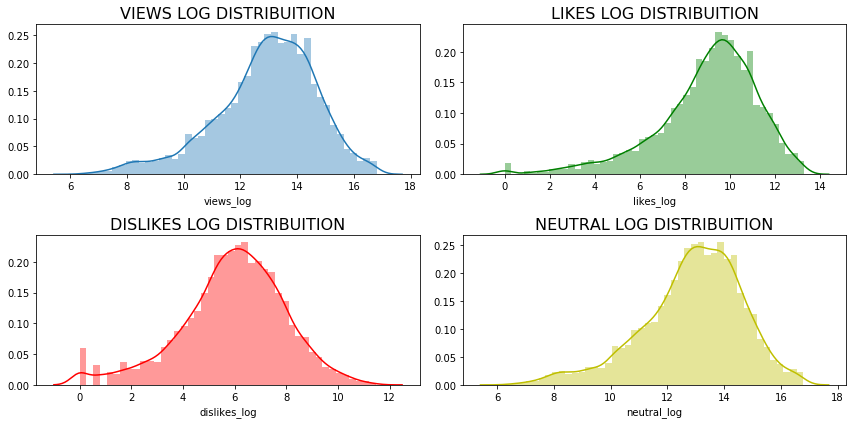

In [204]:
unprocessed_df[['views_log', 'dislikes_log', 'likes_log', 'neutral_log']] = np.log(unprocessed_df[['views', 'dislikes', 'likes', 'neutral']] +1)

plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(unprocessed_df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)
# fig.subplots_adjust(bottom=0.7, top=0.3)

plt.subplot(222)
g2 = sns.distplot(unprocessed_df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

# fig.subplots_adjust(bottom=0.7, top=0.3)

plt.subplot(223)
g3 = sns.distplot(unprocessed_df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)
# fig.subplots_adjust(bottom=0.7, top=0.3)

plt.subplot(224)
g4 = sns.distplot(unprocessed_df['neutral_log'], color='y')
g4.set_title("NEUTRAL LOG DISTRIBUITION", fontsize=16)
plt.tight_layout()
plt.show()

#TODO increase the distance between box plot


1. Views is slightly left tailed distributed, but looks approximately normal data
2. Likes is also slightly left tailed distributed, but looks approximately normal data
3. Dislikes is approximately normal but has a slightly modal distribution on left
4. Neutral views is also slightly bimodal

### Month wise distribution for published time

Here we are extracting month value from published time. Months from june till Nov has very less published videos. The less count from june is due to low data points in the data for these months. Maximum videos are published in the month of Dec and Jan. 


Text(0,0.5,'Count')

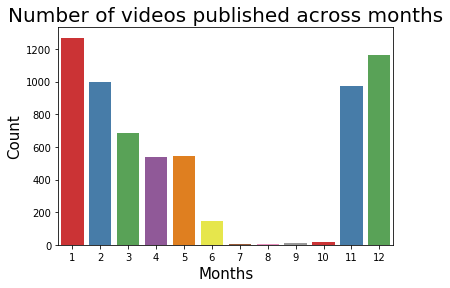

In [205]:
# convert publish time to datetime object
processed_df['publish_time'] = pd.to_datetime(processed_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# extract month from the publish time
processed_df['published_month'] = processed_df['publish_time'].dt.month

# average views per month
avg_mon_views = processed_df.groupby(["published_month"], as_index=False).agg({'views':'mean'})

# plot
g = sns.countplot("published_month", data=processed_df, palette="Set1")
# g.set_xticks(processed_df.published_month.values)
g.set_title("Number of videos published across months", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

### Month wise distribution for trending date

Here we are extracting month from trending date. 
As seen in the graph below, months from june onwards do not have trending data points. April & May have highest average views.

Text(0,0.5,'Average')

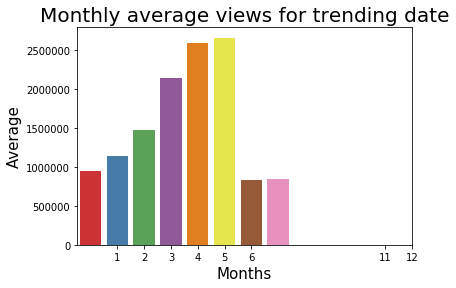

In [206]:
# convert publish time to datetime object
processed_df['trending_date'] = pd.to_datetime(processed_df['trending_date'], format='%y.%d.%m')

# extract month from the publish time
processed_df['trending_month'] = processed_df['trending_date'].dt.month

# average views per month
avg_mon_views = processed_df.groupby(["trending_month"], as_index=False).agg({'views':'mean'})

# plot
g = sns.barplot(x = 'trending_month', y = "views", data=avg_mon_views, palette="Set1")
g.set_xticks(avg_mon_views.trending_month.values)
g.set_title("Monthly average views for trending date", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Average", fontsize=15)

### Day wise distribution for published time

Here we are extracting days of week denoted from 1 to 7. It is assumed the week starts on Monday, which is denoted by 1 and ends on Sunday which is denoted by 7.

The graph below shows that the more number of videos are published during weekday than weekends

Text(0,0.5,'Count')

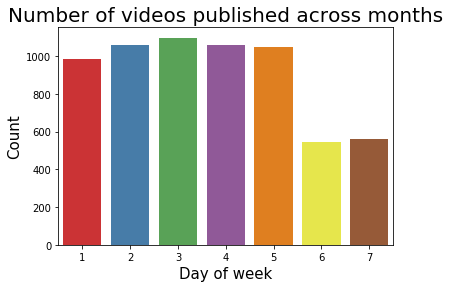

In [207]:
processed_df['publish_time_dayofweek'] = processed_df['publish_time'].dt.dayofweek+1

# dividing data to get boolean of weekend
processed_df['publish_weekend'] = processed_df['publish_time_dayofweek']>5

# average views per month
avg_mon_views = processed_df.groupby(["publish_time_dayofweek"], as_index=False).agg({'views':'mean'})

# plot
g = sns.countplot('publish_time_dayofweek', data=processed_df, palette="Set1")
# g.set_xticks(processed_df.publish_time_dayofweek.values)
g.set_title("Number of videos published across months", fontsize=20)
g.set_xlabel("Day of week", fontsize=15)
g.set_ylabel("Count", fontsize=15)

### Day wise distribution for trending date

The trending data also shows that the videos are trending more in mid-week as compared to weekends.

Text(0,0.5,'Average')

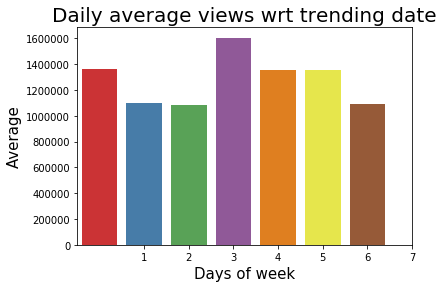

In [208]:
# extract days of week as 1 to 7
processed_df['trending_dayofweek'] = processed_df['trending_date'].dt.dayofweek+1

# dividing data into boolean of weekend
processed_df['trending_weekend'] = processed_df['trending_dayofweek']>5

# average views per month
avg_mon_views = processed_df.groupby(["trending_dayofweek"], as_index=False).agg({'views':'mean'})

# plot
g = sns.barplot(x = 'trending_dayofweek', y = "views", data=avg_mon_views, palette="Set1")
g.set_xticks(avg_mon_views.trending_dayofweek.values)
g.set_title("Daily average views wrt trending date", fontsize=20)
g.set_xlabel("Days of week", fontsize=15)
g.set_ylabel("Average", fontsize=15)

### Hour wise distribution for published time

In [209]:
# separates date and time into two columns from 'publish_time' column
processed_df['time'] = processed_df['publish_time'].dt.time

processed_df[['hour','min','sec']] = processed_df['time'].astype(str).str.split(':', expand=True).astype(int)

processed_df['hour'][:5]

10     2
36    18
41    21
55    19
76    12
Name: hour, dtype: int32

It can be seen from the above graph that the number of views are drastically high at 9:00 am and almost equally distributed throughout the day while showing minimum average number of views at 11:00 am. The Maximum during 9:00 am could be due to the commuters watching music or videos on Youtube

Text(0,0.5,'Average')

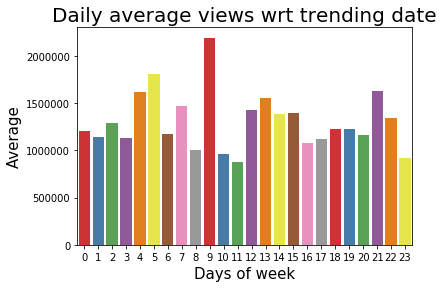

In [210]:
# average views per month
avg_mon_views = processed_df.groupby(["hour"], as_index=False).agg({'views':'mean'})

# plot
g = sns.barplot(x = 'hour', y = "views", data=avg_mon_views, palette="Set1")
g.set_xticks(avg_mon_views.hour.values)
g.set_title("Daily average views wrt trending date", fontsize=20)
g.set_xlabel("Days of week", fontsize=15)
g.set_ylabel("Average", fontsize=15)

### Category wise distribution 

Entertainment category has maximum number of videos followed by music. Where as non profit activism and shows have minimum videos

Text(0,0.5,'Count')

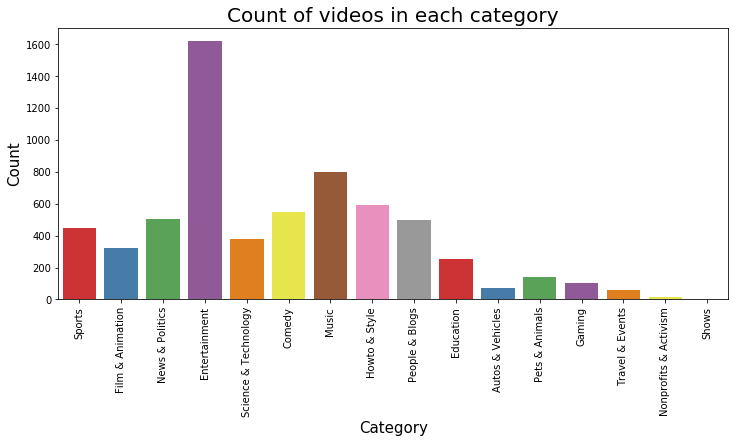

In [211]:
# set the graph size
fig, ax = plt.subplots(figsize=[12,5])

# count plot
g = sns.countplot('category_name', data=processed_df, palette="Set1",ax = ax)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Count of videos in each category", fontsize=20)

# Initialize Figure and Axes object
# plt.figure(figsize=(16, 10))
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)

### Average views in each category

The graph shows that the maximum number of videos on youtube are Entertainment related. But in terms of views, the category that achieves maximum number of average views is music followed by gaming. News and Politics receive minimum number of views. This meas that not many people usually watch news on Youtube.

Text(0,0.5,'Average Views')

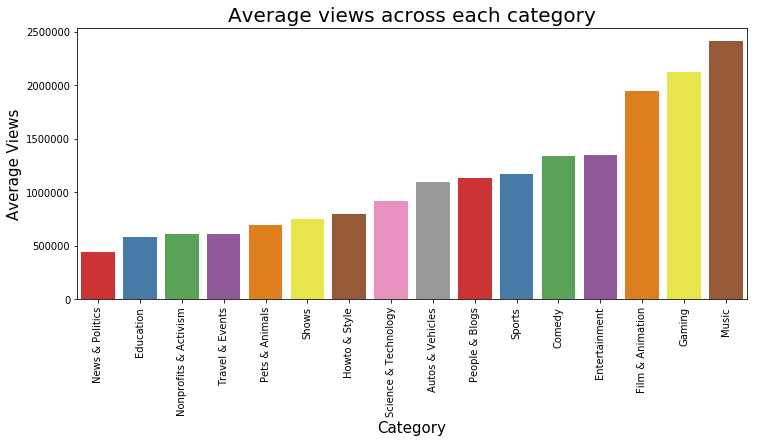

In [212]:
avg_views = processed_df.groupby(["category_name"], as_index=False).agg({'views':'mean'})
avg_views = avg_views.sort_values('views')

fig, ax = plt.subplots(figsize=[12,5])
g = sns.barplot(x = 'category_name', y = "views", data=avg_views, palette="Set1", ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
# g.set_xticks(avg_views.category_name.values)
g.set_title("Average views across each category", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Average Views", fontsize=15)

### Merge average category views as a category defining feature

We are merging average views per category as a cateogry defining variable

In [213]:
processed_df = pd.merge(processed_df, avg_views, on = ['category_name'], how = "left")
processed_df = processed_df.rename(columns = {'views_x':'views', 'views_y':'cat_average_views'})
processed_df.shape

(6354, 33)

### Time difference between trending date and published date

We are taking a number of days difference between trending date and published date. This variable can also act as a proxy for age of the video.

In [214]:
processed_df['timediff'] = (processed_df['trending_date'] - processed_df['publish_time']).dt.days
processed_df['timediff'][:5]

0    0
1    1
2    1
3    3
4    3
Name: timediff, dtype: int64

### Counting the word counts in title and tags

We hypothesize that the longer the video title length is lesser the views for that video, as no one will type long title to search a video. Also the title of a video should be short and eye catching to get maximum views. Hence we are creating a variable called count of words in title. 

Similarly the number of hash tags in the video increases its chances of visiblity. Hence we are creating a variable of count of tags.

In [215]:
# Word count in title and tags
processed_df['count_word']=processed_df["title"].apply(lambda x: len(str(x).split()))
processed_df['count_tags']=processed_df["tags"].apply(lambda x: len(set(str(x).split("|"))))
processed_df[['count_tags', 'count_word']][:5]

,count_tags,count_word
0,49,16
1,28,8
2,10,10
3,14,13
4,8,9


# Outcome Variable 

Our original plan is to develop a weighted score by taking into account the proportion “like”, “dislike” and “neural” comments to determine the popularity level. However, after examining the distribution of the “like”, “dislike” and “neural”, only ~3% of the total comments are either “like” or “dislike”. We decide to use the total number of views as the single outcome/target. We use the like and dislike as prediction features. 

In [216]:
def outcome(df, w1,w2,w3, num):
    """
    
    Calculate the dependent variable using likes , dislikes and neural behaviour of the views. 
    Assign different weights to calculate popularity score
    Popularity score is a weighted average of each likes, dislikes and neutral values
    Popularity score is further divided into 3 classes as low
    
    Parameters
    ----------
    df : dataframe having likes, dislikes and views
    w1 : weight for views
    w2 : weight for likes
    w3 : weight for dislikes
    num : number of scenario generation
    
    Returns
    ----------
    Dataframe with popularity level 
    """
    
    y = w1*df['likes']+w2*df['neutral']+w3*df['dislikes']

    df["y_cat_"+ str(num)] =pd.qcut(y ,3,labels=["low", "medium", "high"])  
    return df

processed_df = outcome(processed_df, 1/3,1/3,1/3, 1) # equally important
processed_df = outcome(processed_df, 0.9,0, 0.1, 2) #likes more important
processed_df = outcome(processed_df, 0.5,0.05, 0.45, 3) #likes more important
# processed_df = outcome(processed_df, 1/2,1/4,1/4, 2) # likes more important
# processed_df = outcome(processed_df, 1/2,3/8,1/8, 3) # likes more important
# processed_df = outcome(processed_df, 0.6,0.2,0.2, 3) # likes more important
# processed_df = outcome(processed_df, 0.6,0.3,0.1, 2) #ikes more important

In [217]:
print("Percentage of neutral in the data set", round(processed_df['neutral'].sum()/sum(processed_df['neutral']+processed_df['likes']+processed_df['dislikes']),3))
print("Percentage of likes in the data set", round(processed_df['likes'].sum()/sum(processed_df['neutral']+processed_df['likes']+processed_df['dislikes']),3))
print("Percentage of dislikes in the data set", round(processed_df['dislikes'].sum()/sum(processed_df['neutral']+processed_df['likes']+processed_df['dislikes']),3))

Percentage of neutral in the data set 0.969
Percentage of likes in the data set 0.029
Percentage of dislikes in the data set 0.001


## Compare across popularity level with different weights

This shows that even after changing weights drastically the class of the videos are not changing much. This also means that the class of the video is not sensitive to weights. This is because in our dataset the neutral views highly contributes to the overall views. Hence the weights methodology to divide videos into popularity levels may not work best. 

In [218]:
classes_changed = [sum(processed_df['y_cat_1'] != processed_df['y_cat_2']),
sum(processed_df['y_cat_2'] != processed_df['y_cat_3']),
sum(processed_df['y_cat_1'] != processed_df['y_cat_3'])]
classes_changed

[1643, 1352, 354]

## Divide views into three equal classes

Below is the quantitle distribution of the number of views

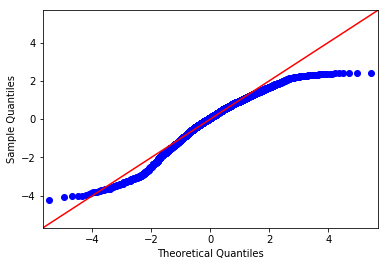

In [219]:
import statsmodels.api as sm
fig = sm.qqplot(processed_df['views_log'], stats.t, fit=True, line='45')
plt.show()

Hence to define outcome variable we decided to divide the number of views columns into 3 equal buckets of low, medium and high based on quantile

In [220]:
processed_df["views_cat"] =pd.qcut(processed_df['views'] ,3,labels=["low", "medium", "high"])
processed_df["views_cat"][:3]

0       low
1    medium
2       low
Name: views_cat, dtype: category
Categories (3, object): [low < medium < high]

## Correlation plot

The following correlation heatmap shows that likes, comment count, neutral are highly correlated. 

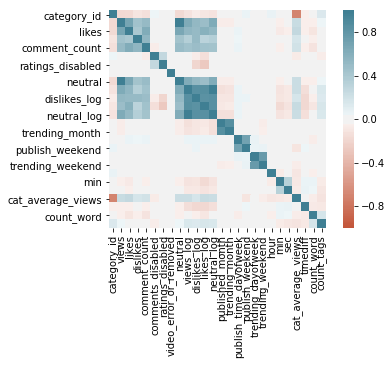

In [221]:
corr = processed_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Target and Indepedent Variables

Here we are setting target as views category and selecting a list of following independent variables.

In [222]:
target = ['views_cat']
X = processed_df[['timediff', 'comments_disabled', 'ratings_disabled', 'comment_count',
       'video_error_or_removed', 'category_name', 'published_month', 'trending_month',
       'publish_weekend','trending_weekend','hour', 'count_word',
       'count_tags', 'dislikes', 'likes', 'cat_average_views']]
X.columns

Index(['timediff', 'comments_disabled', 'ratings_disabled', 'comment_count',
       'video_error_or_removed', 'category_name', 'published_month',
       'trending_month', 'publish_weekend', 'trending_weekend', 'hour',
       'count_word', 'count_tags', 'dislikes', 'likes', 'cat_average_views'],
      dtype='object')

## Check categorical values 

We have only category name as a categorical value in our list of independents.

In [223]:
def categorical_feature_checker(df, target, dtype):
    """
    The categorical feature checker

    Parameters
    ----------
    df : dataframe
    target : the target
    dtype : the type of the feature
    
    Returns
    ----------
    The categorical features and their number of unique value
    """
    
    feature_number = [[feature, df[feature].nunique()] 
                      for feature in df.columns 
                      if feature not in target and df[feature].dtype.name == dtype]
    
    print('%-30s' % 'Categorical feature', 'Number of unique value')
    for feature, number in sorted(feature_number, key=lambda x : x[1]):
        print('%-30s' % feature, number)
    
    return feature_number
feature_number = categorical_feature_checker(X, target, 'object')

Categorical feature            Number of unique value
category_name                  16


## One hot encoding

In this step we are converting category names into boolean columns using one hot encoding.

In [224]:
X = pd.get_dummies(data = X)
X.head()

,timediff,comments_disabled,ratings_disabled,comment_count,video_error_or_removed,published_month,trending_month,publish_weekend,trending_weekend,hour,...,category_name_Howto & Style,category_name_Music,category_name_News & Politics,category_name_Nonprofits & Activism,category_name_People & Blogs,category_name_Pets & Animals,category_name_Science & Technology,category_name_Shows,category_name_Sports,category_name_Travel & Events
0,0,False,False,177.0,False,11,11,False,False,2,...,0,0,0,0,0,0,0,0,1,0
1,1,False,False,2111.0,False,11,11,True,False,18,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,413.0,False,11,11,True,False,21,...,0,0,1,0,0,0,0,0,0,0
3,3,False,False,605.0,False,11,11,False,False,19,...,0,0,0,0,0,0,0,0,0,0
4,3,False,False,260.0,False,11,11,False,False,12,...,0,0,0,0,0,0,1,0,0,0


# Separate train and test to predict the model

We are separating 2% of the dataset for prediction. Rest of the data will be used for model building exercise using grid search and cross validation

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, processed_df[target], random_state=0, test_size=0.02)

# Model Building

## Defining models and hyper parameters

We are building following classifiers: 
- Logistic Regression

- Multi Layer Perceptron

- Decision Tree

- Random Forest

- XGBoost

- K-Nearest Neighbour

- Naive Bayes


In [226]:
clfs = { 'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'xgb': XGBClassifier(seed=0),
        'svc': SVC(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])
    

We are tuning the following hyperparameters of the classifiers:
    
| Classifier             |  Hyper parameters                                |
|:-----------------------|:------------------------------------------------:| 
| Logistic regression    |  multi class, solver and C                       |
| Multi Layer Perceptron |  Hidden layer sizes and activation function      | 
| Decision Tree          |  min samples split and min samples leaf          | 
| Support Vector Machine |  C and gamma                                     | 
| Random forest          |  min samples split, min samples leaf, estimators | 
| KNN                    |  n neighbours                                    | 
| Naiye Bayes            |  variable smoothing                              | 
| xgboost                |  learning rate, gamma and lambda                 | 



In [227]:
param_grids = { }
# logistic
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid

# MLP
param_grid = [{'clf__hidden_layer_sizes': [10, 100],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid

# Decision tree
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['dt'] = param_grid

# xgboost
param_grid = [{'clf__learning_rate': [10 ** i for i in range(-4, 1)],
               'clf__gamma': [0, 10, 100],
               'clf__reg_lambda': [10 ** i for i in range(-4, 5)]}]

param_grids['xgb'] = param_grid

# SVC
param_grid = [{'clf__C': [10 ** i for i in range(-4, 5)],
               'clf__gamma': ['auto', 'scale']}]

param_grids['svc'] = param_grid

#Knn
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]

param_grids['knn'] = param_grid

#GNB
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]

param_grids['gnb'] = param_grid
param_grids

# Random forest
param_grid = [{'clf__n_estimators': [10, 100],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

Below are all 7 classifiers:

In [228]:
pipe_clfs

{'lr': Pipeline(memory=None,
          steps=[('StandardScaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('clf',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='warn', n_jobs=None,
                                     penalty='l2', random_state=0, solver='warn',
                                     tol=0.0001, verbose=0, warm_start=False))],
          verbose=False), 'mlp': Pipeline(memory=None,
          steps=[('StandardScaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('clf',
                  MLPClassifier(activation='relu', alpha=0.0001,
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping

## Grid Search

We have used grid search method to loop across various hyperparameters and classifiers. We are using 5-fold cross validation method to avoid overfitting issue. We will using the model which gives best accuracy for prediction. 

In [229]:
# The list of [best_score_, best_params_, best_estimator_]
complete_gs = []
best_score_param_estimators = []
# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    # Implement me
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=1,
                      iid=False,
                      cv=StratifiedKFold(n_splits=5,
                                         shuffle=True,
                                         random_state=0))

    
    gs = gs.fit(X_train, y_train)
    # Update best_score_param_estimators
    
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

In [230]:
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.8265367428452078, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.8215582349407065, {'clf__gamma': 0, 'clf__learning_rate': 1, 'clf__reg_lambda': 1000}, <class 'xgboost.sklearn.XGBClassifier'>]

[0.7989118579123659, {'clf__activation': 'relu', 'clf__hidden_layer_sizes': 10}, <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>]

[0.787981315929936, {'clf__min_samples_leaf': 30, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.7873517664259174, {'clf__C': 100, 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.7756192998244016, {'clf__C': 10, 'clf__gamma': 'auto'}, <class 'sklearn.svm.classes.SVC'>]

[0.6058479901603075, {'clf__n_neighbors': 4}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.47542823032512765, {'clf__var_smoothing': 1e-0

## Feature Importance 

We have used best estimator of random forecast to get feature importances. As expected likes, dislikes and comment count are the top three important features. They are followed by count of tags, timediff (proxy for age of video), count of words in title, and so on

In [232]:
# this chunk may not run depending on the gs best estimator hence commented
# (pd.Series(gs.best_estimator_.named_steps['clf'].feature_importances_, index=X.columns)
#    .nlargest(10)
#    .plot(kind='barh'))   


## Model accuracy

Below table gives the best accuracy for all 7 classifiers. Random forest and xgboost are giving highest accuracy. This is followed by MLP, decision tree, logistic regression and SVM. We are getting lowest accuracy by Naiye Bayes and KNN.

In [233]:
# declare list for index
index_list = []

# convert list to dataframe
best_score_df = pd.DataFrame(best_score_param_estimators, columns = ['Accuracy', 'Parameters', 'Pipeline'])

# extract names of the models
for num in range(len(best_score_param_estimators)):
    index_list.append(str(best_score_df['Pipeline'][num]['clf']).split('(')[0])
    
# set index as model names
best_score_df.index = index_list
best_score_df

,Accuracy,Parameters,Pipeline
RandomForestClassifier,0.826537,"{'clf__min_samples_leaf': 1, 'clf__min_samples...","(StandardScaler(copy=True, with_mean=True, wit..."
XGBClassifier,0.821558,"{'clf__gamma': 0, 'clf__learning_rate': 1, 'cl...","(StandardScaler(copy=True, with_mean=True, wit..."
MLPClassifier,0.798912,"{'clf__activation': 'relu', 'clf__hidden_layer...","(StandardScaler(copy=True, with_mean=True, wit..."
DecisionTreeClassifier,0.787981,"{'clf__min_samples_leaf': 30, 'clf__min_sample...","(StandardScaler(copy=True, with_mean=True, wit..."
LogisticRegression,0.787352,"{'clf__C': 100, 'clf__multi_class': 'multinomi...","(StandardScaler(copy=True, with_mean=True, wit..."
SVC,0.775619,"{'clf__C': 10, 'clf__gamma': 'auto'}","(StandardScaler(copy=True, with_mean=True, wit..."
KNeighborsClassifier,0.605848,{'clf__n_neighbors': 4},"(StandardScaler(copy=True, with_mean=True, wit..."
GaussianNB,0.475428,{'clf__var_smoothing': 1e-08},"(StandardScaler(copy=True, with_mean=True, wit..."


# Prediction

In [235]:
best_estimator = best_score_param_estimators[0][2]
y_pred = best_estimator.predict(X_test)

In [236]:
y_pred.shape

(128,)

## Confusion Matrix

The confusion matrix shows the ways in which your classification model is confused when it makes predictions. Below confusion matrix shows that there are only 7 values predicted as medium which were actually high and low whereas 2  and 5 values predicted as high and low when this as actually medium.

In [237]:
confusion_matrix = ConfusionMatrix(np.array(y_test['views_cat']), y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted  high  low  medium  __all__
Actual                               
high         34    0       7       41
low           0   44       7       51
medium        2    5      29       36
__all__      36   49      43      128


The same can be visualized in a form of heatmap as below:

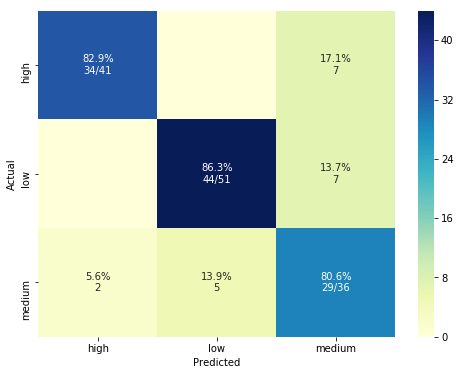

In [243]:
from pandas_ml import ConfusionMatrix
def plot_cm(y_true, y_pred, figsize=(8,6)):
    """
    
    plot confusion matrix with percentages of accuracy
    
    Parameters
    ----------
    y_true : actual values
    y_test : actual values
    Returns
    ----------
    Dataframe with treated outlier values
    """
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(np.array(y_test['views_cat']), y_pred)


## Receiver operating characteristic curve

Below is AUC and ROC curve when class 0 represents low, class 1 represents medium, and class 2 represents high. As seen from the graph class 0 and 2 has better auc curve than class 1. For all class AUC is above 80 which shows that model has good measure of separability.

0
1
2


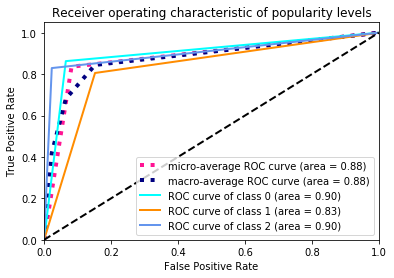

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [242]:
# Compute ROC curve and ROC area for each class
# Binarize the output
y_test_2 = label_binarize(y_test, classes=["low", "medium", "high"])
y_pred_2 = label_binarize(y_pred, classes=["low", "medium", "high"])
n_classes = y_test_2.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:,i], y_pred_2[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
   
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), y_pred_2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute micro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw = 2
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of popularity levels')
plt.legend(loc="lower right")
plt.show()
plt.figure()

# Conclusion

With regards to target variable, most of the views on YouTube are neutral and very minimal percentage of data has positive and negatives views hence weighted sum method did not work well. Hence we used number of views to decide upon popularity level. Number of views were further divided into three equal quantiles such as low, medium and high.

Model:
Random Forecast and XGBoost give highest accuracy of 82%, followed by MLP, decision tree, logistic  and SVM . Naiye Bayes and KNN give lowest accuracy


# Limitation

There were certain limitation in this analysis as follows:
1. This dataset is a sample of top trending videos for a day. Hence this a a biased dataset. 
2. The dataset used do not include information about typical visual features and video characteristics  such  as background color, video resolution, or textual characteristics of a video etc an average ratio of the text region size with respect to the frame size. 
3. Less data points after eliminating instances of same video id.


# Future work

We can further enhance this work using a diverse dataset with a wide range of popularity levels and visual features that can be extracted before a video is published online. We can also determine country-specific popular genres and prediction of popularity. Also use natural language processing for extracting information from descriptions, channel title and comments to sentiment on the video.

# References

1.    We Are Social, & Hootsuite, & DataReportal. (October 25, 2019). Most popular social networks worldwide as of October 2019, ranked by number of active users (in millions) [Graph]. In Statista. Retrieved December 08, 2019, from https://www.statista.com/statistics/272014/global-social-networks-ranked-by-number-of-users/.

2.    T. Trzciński and P. Rokita, "Predicting Popularity of Online Videos Using Support Vector Regression," in IEEE Transactions on Multimedia, vol. 19, no. 11, pp. 2561-2570, Nov. 2017.doi: 10.1109/TMM.2017.2695439. Retrieved from https://arxiv.org/pdf/1510.06223.pdf

3.    Soufana Mekouar, Nabila Zrira, and El-Houssine Bouyakhf. 2017. Popularity Prediction of Videos in YouTube as Case Study: A Regression Analysis Study. In Proceedings of the 2nd international Conference on Big Data, Cloud and Applications (BDCA'17). ACM, New York, NY, USA, Article 51, 6 pages. DOI: https://doi.org/10.1145/3090354.3090406

4.    S. H. Doong, "Predicting Twitter Hashtags Popularity Level," 2016 49th Hawaii International Conference on System Sciences (HICSS), Koloa, HI, 2016, pp. 1959-1968. DOI: 10.1109/HICSS.2016.247 Retrieved from https://ieeexplore.ieee.org/document/7427428

